#Parte 0: Il Dataset

Il file bdastudents.csv (separatore ;) contiene una libera variazione del dataset
“Student Perfomance” disponibile nell’UCI Machine Learning Repository
http://archive.ics.uci.edu/ml/datasets/Student+Performance

Il file rappresenta alcuni dati su studenti che frequentano 2 insegnamenti in 2 scuole
diverse e il campo G3 la valutazione finale (da predire).

Lo schema del dataset è
* School - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da
Silveira)
*sex - student's sex (binary: 'F' - female or 'M' - male)
*age - student's age (numeric: from 15 to 22)
*address - student's home address type (binary: 'U' - urban or 'R' - rural)
*famsize - family size (binary: 0' - less or equal to 3 or 1 - greater than 3)
*Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' -
apart)
*Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade),
2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
*Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade),
2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
*Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services'
(e.g. administrative or police), 'at_home' or 'other')
*Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services'
(e.g. administrative or police), 'at_home' or 'other')
*reason - reason to choose this school (nominal: close to 'home', school
'reputation', 'course' preference or 'other')
*guardian - student's guardian (nominal: 'mother', 'father' or 'other')
*traveltime - home to school travel time (numeric: 1 - < 15 min., 2 - 15 to 30
min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
*studytime - weekly study time (numeric: 1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to
10 hours, or 4 - >10 hours)
*failures - number of past class failures (numeric: n if 1<=n< 3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese)
(binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)

* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 -
excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)
* G1 - first period grade (numeric: from 0 to 2)
* G2 - second period grade (numeric: from 0 to 2)
* *G3 - final grade (numeric: from 0 to 2)*

#Parte 1: Analisi
1. Caricare il dataset e denominarlo con una variabile chiamata “dataset”
2. Quante sono le istanze contenute nel dataset?
Il dataset è bilanciato rispetto alle
scuole e ai generi degli studenti analizzati? (punti 1).
3. Creare un nuovo attributo “GRate” che misuri per ogni studente la differenza tra la
valutazione ricevuta nel primo e nel secondo periodo (punti 2)
4. Realizzare un grafico che rappresenti per ogni età questa differenza.
Sono mediamente più bravi (attributo G3) i ragazzi o le ragazze? Esistono delle variazioni
rilevanti nelle due scuole considerate? (punti 2)
5. Tra i genitori degli studenti considerati, il livello di “educazione” maschile e femminile varia?
Sono generalmente più scolarizzati i padri o le madri? Visualizzare poi un grafico che rappresenti
il concetto (punti 2).
6. Indicare cosa visualizza l’istruzione: *ds["G3"].groupby([ds["G3"],ds["address"]] ).count().plot()*
Si tratta di una operazione significativa? (punti 3)

##1)Caricare il dataset e denominarlo con una variabile chiamata “dataset”

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as sk
import time

In [ ]:
dataset = pd.read_csv('/content/bdastudents.csv',sep=';')

##2)Quante sono le istanze contenute nel dataset? Il dataset è bilanciato rispetto alle scuole e ai generi degli studenti analizzati? (punti 1).

In [ ]:
dataset.shape

(1044, 32)

In [ ]:
#Il dataset presenta 1044 istanze, ciascuna di 32-1 = 31 features

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   int64 
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   int64 
 16  famsup      1044 non-null   int64 
 17  paid        1044 non-null   int64 
 18  nursery     1044 non-null   int64 
 19  higher      1044 non-null   int64 
 20  internet

In [ ]:
#non ci sono elementi NaN

In [ ]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,1,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,1,1,0,0,4,3,4,1,1,3,6,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,1,1,0,5,3,3,1,1,3,4,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,1,1,1,0,4,3,2,2,3,3,10,1,1,1
3,GP,F,15,U,1,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,3,2,2,1,1,5,2,2,1,2
4,GP,F,16,U,1,T,3,3,other,other,home,father,1,2,0,0,1,1,1,1,0,0,4,3,2,1,2,5,4,0,1,1


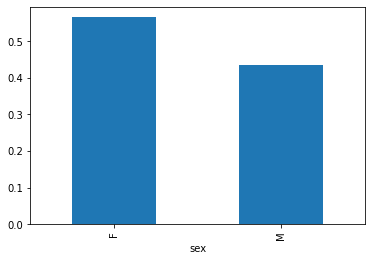

sex
F    0.566092
M    0.433908
dtype: float64


In [ ]:
(dataset.groupby('sex').size()/len(dataset)).plot(kind='bar',)
plt.show()
print(dataset.groupby('sex').size()/len(dataset))

In [ ]:
#il dataset è sbilanciato rispetto la feature "sex"
#sono presenti circa il 57% di femmine ed il 43% di maschi

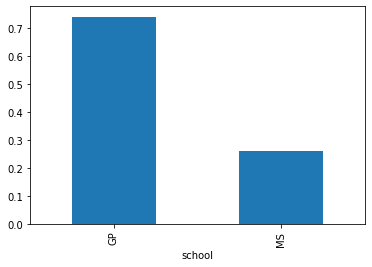

school
GP    0.739464
MS    0.260536
dtype: float64


In [ ]:
(dataset.groupby('school').size()/len(dataset)).plot(kind='bar',)
plt.show()
print(dataset.groupby('school').size()/len(dataset))

In [ ]:
#Il dataset è fortemente sbilanciato rispetto la scuola di appartenenza

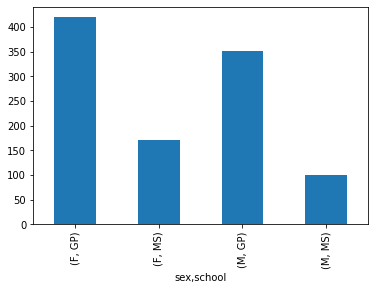

In [ ]:
dataset.groupby(['sex','school']).size().plot(kind='bar')

In [ ]:
(dataset.groupby(['sex','school']).size()/len(dataset))

sex  school
F    GP        0.402299
     MS        0.163793
M    GP        0.337165
     MS        0.096743
dtype: float64

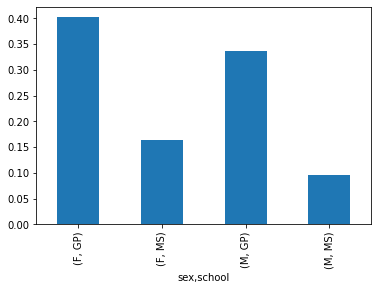

In [ ]:
(dataset.groupby(['sex','school']).size()/len(dataset)).plot.bar()

In [ ]:
#la distribuzione tra maschi e femmine nelle due scuole non è di molto diversa (meno del 10%)

##3)Creare un nuovo attributo “GRate” che misuri per ogni studente la differenza tra la valutazione ricevuta nel primo e nel secondo periodo (punti 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   int64 
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   int64 
 16  famsup      1044 non-null   int64 
 17  paid        1044 non-null   int64 
 18  nursery     1044 non-null   int64 
 19  higher      1044 non-null   int64 
 20  internet

In [ ]:
dataset.iloc[:,-3:-1]

,G1,G2
0,0,0
1,0,0
2,1,1
3,2,1
4,0,1
...,...,...
1039,1,1
1040,2,2
1041,1,1
1042,1,1


In [ ]:
deltaG12 = dataset.G1 - dataset.G2

In [ ]:
dataset.insert(31,'deltaG',deltaG12)

In [ ]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,deltaG,G3
0,GP,F,18,U,1,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,1,1,0,0,4,3,4,1,1,3,6,0,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,1,1,0,5,3,3,1,1,3,4,0,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,1,1,1,0,4,3,2,2,3,3,10,1,1,0,1
3,GP,F,15,U,1,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,3,2,2,1,1,5,2,2,1,1,2
4,GP,F,16,U,1,T,3,3,other,other,home,father,1,2,0,0,1,1,1,1,0,0,4,3,2,1,2,5,4,0,1,-1,1


##Realizzare un grafico che rappresenti per ogni età questa differenza. 

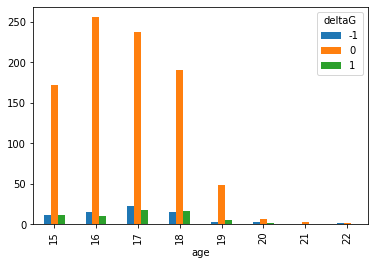

In [ ]:
dataset.groupby(['age','deltaG']).size().unstack().plot.bar()

In [ ]:
age_num=dataset.groupby('age').size()

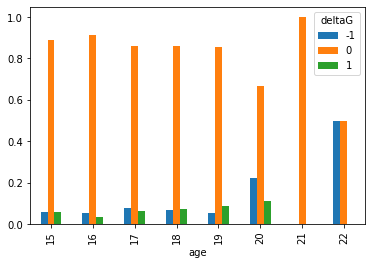

In [ ]:
(dataset.groupby(['age','deltaG']).size()/age_num).unstack().plot.bar()

In [ ]:
#considerando le percentuali relative per età degli studenti, nella maggior parte
#delle fasce di età l'ottanta percento (80%) non subisce variazioni di voto
#alcuni studenti di 16,17 e 20 anni peggiorano in quantità maggiore
#alcuni studenti di 19 migliorano in quantità maggiore
#gli studenti di 21 anni non subiscono variazioni di voto
#gli studenti di 22 anni hanno in grossa parte (più del 40%) peggiorato il voto
#mentre i restanti non hanno subito variazioni

##4)Sono mediamente più bravi (attributo G3) i ragazzi o le ragazze? Esistono delle variazioni rilevanti nelle due scuole considerate? (punti 2)

In [ ]:
dataset.groupby(['sex','G3']).size().unstack()

G3,0,1,2
sex,,,
F,47,424,120
M,34,335,84


In [ ]:
FM_size = dataset.groupby(['sex']).size()

sex  G3
F    0     0.079526
     1     0.717428
     2     0.203046
M    0     0.075055
     1     0.739514
     2     0.185430
dtype: float64


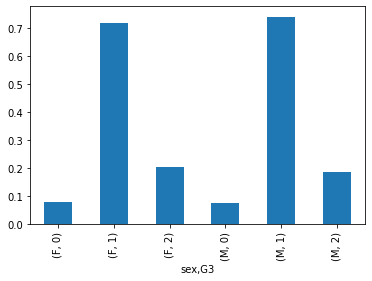

In [ ]:
(dataset.groupby(['sex','G3']).size()/FM_size).plot(kind='bar')
print((dataset.groupby(['sex','G3']).size()/FM_size))

In [ ]:
#le performance scolastiche (attributo G3) relative di maschi e femmine non
#differiscono di molto

In [ ]:
school_sizes = dataset.groupby(['school']).size()
print(school_sizes)

school
GP    772
MS    272
dtype: int64


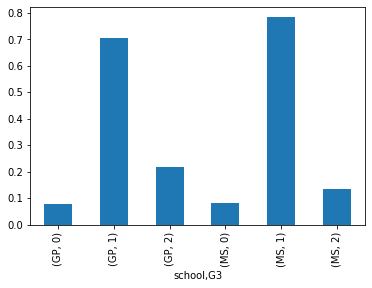

In [ ]:
(dataset.groupby(['school','G3']).size()/school_sizes).plot.bar()

In [ ]:
dataset.groupby(['school','G3']).size()/school_sizes

school  G3
GP      0     0.076425
        1     0.707254
        2     0.216321
MS      0     0.080882
        1     0.783088
        2     0.136029
dtype: float64

In [ ]:
#la scuola GP ha quasi il 10% in più di studenti che hanno l'attributo
#voto finale G3=2

##5)Tra i genitori degli studenti considerati, il livello di “educazione” maschile e femminile varia? Sono generalmente più scolarizzati i padri o le madri? Visualizzare poi un grafico che rappresenti il concetto (punti 2).

In [ ]:
'''Medu - mother's education 
(numeric: 0 - none, 1 - primary education (4th grade), 
2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father's education 
(numeric: 0 - none, 1 - primary education (4th grade), 
2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
'''
Fathers_edu = dataset.groupby(['Fedu']).size()
Mothers_edu = dataset.groupby(['Medu']).size()

In [ ]:
Parents_edu = pd.concat([Fathers_edu,Mothers_edu], keys=['Fedu','Medu'])

In [ ]:
Parents_edu

      Fedu
Fedu  0         9
      1       256
      2       324
      3       231
      4       224
Medu  0         9
      1       202
      2       289
      3       238
      4       306
dtype: int64

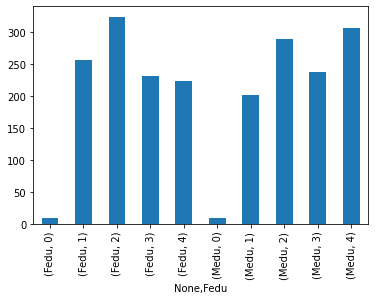

In [ ]:
Parents_edu.plot.bar()

In [ ]:
#I padri degli studenti hanno educazione di livello più basso rispetto le madri
#le madri in particolare risultano avere una educazione di livello 4 (superiore)

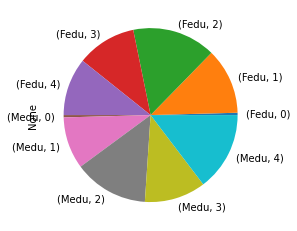

In [ ]:
Parents_edu.plot.pie()

##6)Indicare cosa visualizza l’istruzione: ds["G3"].groupby([ds["G3"],ds["address"]] ).count().plot() Si tratta di una operazione significativa? (punti 3)

In [ ]:
vote_by_address = dataset["G3"].groupby([dataset["G3"],dataset["address"]] ).count()
print(vote_by_address)

G3  address
0   R           27
    U           54
1   R          217
    U          542
2   R           41
    U          163
Name: G3, dtype: int64


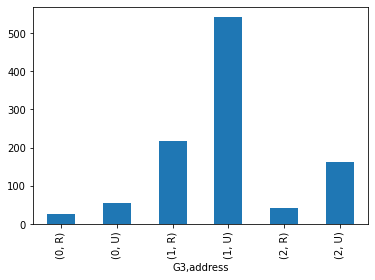

In [ ]:
vote_by_address.plot.bar()

In [ ]:
'''
L'operazione è significativa in quanto si stanno considerando le aree di residenza
degli studenti a seconda del voto.
Il problema è che questi dati non sono relativi al numero di studenti totali abitanti
nelle regioni urbane e rurali. Ci aspettiamo più numero di studenti residenti in
zone urbane e quindi un conto maggiore dei vari voti
'''

"\nL'operazione è significativa in quanto si stanno considerando le aree di residenza\ndegli studenti a seconda del voto.\nIl problema è che questi dati non sono relativi al numero di studenti totali abitanti\nnelle regioni urbane e totali. Ci aspettiamo più numero di studenti residenti in\nzone urbane e quindi un conto maggiore dei vari voti\n"

In [ ]:
addr_size = dataset.groupby('address').size()
print(addr_size)

address
R    285
U    759
dtype: int64


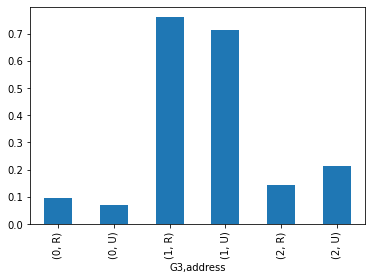

In [ ]:
(vote_by_address/addr_size).plot.bar()

In [ ]:
#considerando la popazione relativa di studenti (normalizzando per il numero di
#studenti provenienti da aree rurali/urbane) possiamo notare solo una leggera
#percentuale maggiore relativa di studenti aventi voto G3=2 di aree urbane
#per gli studenti provenienti da aree rurali è più alta la percentuale
#di voto = 0 e voto = 1

#Parte 2: Trasformazione e Predizione (20 punti)
1. Scikit-learn utilizza un array numpy per effettuare le proprie predizioni. Gli elementi
dell’array numpy devono essere di tipo numerico. Creare un dataset chiamato “numeric” che
contiene solo le features numeriche.
Creare poi un nuovo dataset “reduced” dall’originale con le colonne G1 e G2 e un dataset
“lessReduced” togliendo da numeric unicamente le colonne G1 e G2(punti 1).
2. Si vuole predire G3 sulla base degli altri attributi presenti nel dataset. Dividere i dataset
numeric, lessReduced e reduced in modo che 2/3 degli elementi siano contenuti in un nuovo
dataset “train” e 1/3 nel dataset “test” (punti 2).
Valutare l’accuracy ottenuta con il modello LogisticRegression su tutti i dataset
(from sklearn.linear_model import LogisticRegression)
Il valore di accuratezza ottenuto è pari a _____________ .La confusion matrix presenta qualche
valore significativo (punti 1)?

3. Che valore di accuratezza si ottiene con un 10 Fold cross validation e il modello basato su
Decision Tree.
E’ più affidabile la valutazione fatta con la cross validation o quella fatta con una suddivisione
arbitraria del dataset in due parti, training set e test set? Per quale motivo? (punti 2).

4. Considerare il dataset numeric. Considerare l’intervallo di valori assunto dall’attributo age e
dividerlo in tre parti. Associare a ogni istanza il valore 0,1,2 a seconda del fatto che l’età sia nel
primo, nel secondo o nel terzo intervallo. Eliminare l’attributo age originale, non discretizzato e
calcolare l’accuratezza con il metodo 10 cross fold validation. Trasformare la feature discretizzata in 3 feature booleane, una per ogni valore discretizzato. Il
valore assegnato sarà 1 nella colonna che rappresenta il valore in esame. 0 nelle altre colonne.
Calcolare l’accuratezza con il metodo 10 cross fold validation (punti 4).

5. Aggiungere al dataset “numeric” gli attributi Mjob e Fjob il cui valore categorico deve essere
mappato utilizzando una formula di conversione a scelta. Confrontare il risultato ottenuto con
quelli ottenuti in precedenza (punti 4).


6. Partendo dal dataset originale, costruire due dataset contenenti solo le feature numeriche.
Uno che rappresenti la scuola GP e l’altro la scuola MS. Costruire due modelli di predizione
utilizzando il decision tree. Uno per gli studenti GP e l’altro per gli studenti MS. Allenare
entrambi i modelli utilizzando 2/3 delle rispettive istanze come training.
Fondere i test in un unico file.
Verificare l’accuratezza ottenuta dal test in entrambi i modelli. Quale funziona meglio?
(punti 3)

7. Utilizzare un algoritmo di regressione da applicarsi al dataset del punto 1 per predire “G3”.
Arrotondare i valori ottenuti all’intero. Confrontare i risultati ottenuti con quelli ottenuti in
precedenza (punti 3).

##1)Scikit-learn utilizza un array numpy per effettuare le proprie predizioni. Gli elementi dell’array numpy devono essere di tipo numerico. Creare un dataset chiamato “numeric” che contiene solo le features numeriche. Creare poi un nuovo dataset “reduced” dall’originale con le colonne G1 e G2 e un dataset “lessReduced” togliendo da numeric unicamente le colonne G1 e G2(punti 1).

In [ ]:
dataset.dtypes.value_counts()

int64     25
object     8
dtype: int64

In [ ]:
numeric = dataset.select_dtypes(include='int64')
numeric.dtypes.value_counts()

int64    25
dtype: int64

In [ ]:
reduced = dataset.loc[: , ['G1','G2']]
reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      1044 non-null   int64
 1   G2      1044 non-null   int64
dtypes: int64(2)
memory usage: 16.4 KB


In [ ]:
less_reduced = numeric.drop(columns=['G1','G2'])
less_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         1044 non-null   int64
 1   famsize     1044 non-null   int64
 2   Medu        1044 non-null   int64
 3   Fedu        1044 non-null   int64
 4   traveltime  1044 non-null   int64
 5   studytime   1044 non-null   int64
 6   failures    1044 non-null   int64
 7   schoolsup   1044 non-null   int64
 8   famsup      1044 non-null   int64
 9   paid        1044 non-null   int64
 10  nursery     1044 non-null   int64
 11  higher      1044 non-null   int64
 12  internet    1044 non-null   int64
 13  romantic    1044 non-null   int64
 14  famrel      1044 non-null   int64
 15  freetime    1044 non-null   int64
 16  goout       1044 non-null   int64
 17  Dalc        1044 non-null   int64
 18  Walc        1044 non-null   int64
 19  health      1044 non-null   int64
 20  absences    1044 non-null   in

##2)Si vuole predire G3 sulla base degli altri attributi presenti nel dataset. Dividere i dataset numeric, lessReduced e reduced in modo che 2/3 degli elementi siano contenuti in un nuovo dataset “train” e 1/3 nel dataset “test” (punti 2).

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression


In [ ]:
#Classe da predire: G3
#creo un vettore che contiene le label
Y = dataset['G3']
Y.value_counts()

1    759
2    204
0     81
Name: G3, dtype: int64

In [ ]:
#DATASET NUMERIC
X_numeric = numeric.iloc[:,:-1]
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numeric, Y,test_size=2/3 ,random_state=0)

In [ ]:
#DATASET LESS_REDUCED
X_less_reduced = less_reduced.iloc[:,:-1]
X_train_lred, X_test_lred, y_train_lred, y_test_lred = train_test_split(X_less_reduced, Y,test_size=2/3 ,random_state=0)

In [ ]:
#DATASET REDUCED
X_reduced = reduced
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, Y,test_size=2/3,random_state=0)

###Valutare l’accuracy ottenuta con il modello LogisticRegression su tutti i dataset (from sklearn.linear_model import LogisticRegression) Il valore di accuratezza ottenuto è pari a ?.La confusion matrix presenta qualche valore significativo (punti 1)?

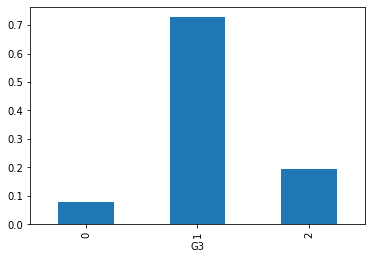

In [ ]:
(dataset.groupby('G3').size()/len(dataset)).plot.bar()

Il dataset è fortemente sbilanciato verso la classe 1. Le classi 2 e 0 sono quindi poco presenti. Ci potremmo aspettare una maggiore performance nel predire la classe 1 rispetto le altre

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix:
 [[ 25  26   0]
 [  4 505   3]
 [  0  27 106]]

Accuracy: 0.9137931034482759 

              precision    recall  f1-score   support

           0       0.86      0.49      0.62        51
           1       0.91      0.99      0.94       512
           2       0.97      0.80      0.88       133

    accuracy                           0.91       696
   macro avg       0.91      0.76      0.81       696
weighted avg       0.91      0.91      0.91       696



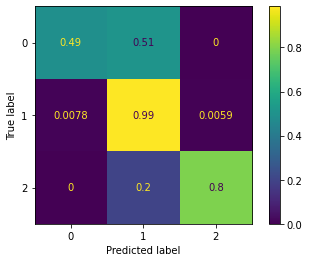

In [ ]:
#DATASET NUMERIC

model = LogisticRegression()
model.fit(X_train_num,y_train_num)
predict = model.predict(X_test_num)
print("Confusion Matrix:\n", confusion_matrix(y_test_num, predict))
print("\nAccuracy:", accuracy_score(y_test_num, predict),"\n")
print(classification_report(y_test_num,predict))
plot_confusion_matrix(model, X_test_num, y_test_num, normalize='true')  
plt.show()  

Il dataset numeric con modello LR produce un' elevata accuracy. Dato che il dataset è sbilanciato, notiamo dalla confusion matrix un errore di predizione elevato per la classe meno presente nel dataset (classe 0). La classe 1 (la più presente) è ben predetta mentre la classe 2 è stata predetta correttamente l'80% delle volte

Confusion Matrix:
 [[ 30  21   0]
 [  6 504   2]
 [  0  29 104]]

Accuracy: 0.9166666666666666 

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        51
           1       0.91      0.98      0.95       512
           2       0.98      0.78      0.87       133

    accuracy                           0.92       696
   macro avg       0.91      0.78      0.84       696
weighted avg       0.92      0.92      0.91       696



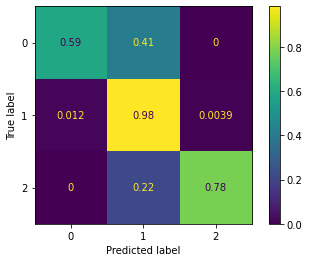

In [ ]:
#DATASET REDUCED

model = LogisticRegression()
model.fit(X_train_red,y_train_red)
predict = model.predict(X_test_red)
print("Confusion Matrix:\n", confusion_matrix(y_test_red, predict))
print("\nAccuracy:", accuracy_score(y_test_red, predict),"\n")
print(classification_report(y_test_red,predict))
plot_confusion_matrix(model, X_test_red, y_test_red, normalize='true')  
plt.show()  

Nonostante la scarsità dei dati presente nel dataset reduced notiamo che l'accuracy è più elevata (rispetto il dataset numeric e less reduced) e che la confusion matrix è simile a quella ottenuta dal modello sul dataset numeric. Resta comunque uno sbilanciamento sul dataset che causa errori di predizione sulla classe 0 e 2, specialmente su 0.
In questo caso le predizione sulla classe 0 è leggermente migliorata rispetto il caso del dataset numeric

Confusion Matrix:
 [[  6  44   1]
 [  5 474  33]
 [  0  91  42]]

Accuracy: 0.75 

              precision    recall  f1-score   support

           0       0.55      0.12      0.19        51
           1       0.78      0.93      0.85       512
           2       0.55      0.32      0.40       133

    accuracy                           0.75       696
   macro avg       0.63      0.45      0.48       696
weighted avg       0.72      0.75      0.71       696



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


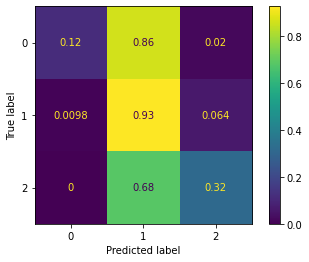

In [ ]:
#DATASET LESS REDUCED

model = LogisticRegression()
model.fit(X_train_lred,y_train_lred)
predict = model.predict(X_test_lred)
print("Confusion Matrix:\n", confusion_matrix(y_test_lred, predict))
print("\nAccuracy:", accuracy_score(y_test_lred, predict),"\n")
print(classification_report(y_test_lred,predict))
plot_confusion_matrix(model, X_test_lred, y_test_lred, normalize='true')  
plt.show()  

Il dataset less reduced causa una minore accuracy con lo stesso modello. La rimozione delle features G1 e G2 ha ridotto di molto le sue performance. Dalla confusion matrix si nota che ci sono predizioni errate sulla classe 0 e 2 in percentuale maggiore rispetto i 2 modelli precedentemente visti

##3)Che valore di accuratezza si ottiene con un 10 Fold cross validation e il modello basato su Decision Tree. E’ più affidabile la valutazione fatta con la cross validation o quella fatta con una suddivisione arbitraria del dataset in due parti, training set e test set? Per quale motivo? (punti 2).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

Results:
 [0.94444444 0.83333333 0.77777778 0.83333333 0.83333333 0.83333333
 0.77777778 0.83333333 0.70588235 1.         0.88235294 0.76470588
 1.         0.70588235 0.94117647 0.88235294 0.82352941 1.
 0.76470588 0.94117647] 
Mean Accuracy: 0.8539215686274512 
Accuracy STD:  0.09040009606012096


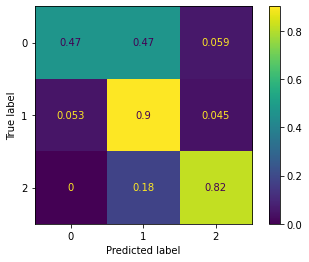

In [ ]:
#DATASET NUMERIC

model_num = DecisionTreeClassifier()
model_num.fit(X_train_num,y_train_num)
predict = model_num.predict(X_test_num)
cv_results = cross_val_score(model_num, X_train_num , y_train_num, cv=20, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())
plot_confusion_matrix(model_num, X_test_num, y_test_num, normalize='true')  
plt.show()

Results:
 [0.94444444 0.88888889 0.88888889 0.88888889 1.         0.83333333
 0.83333333 1.         0.94117647 1.         0.88235294 1.
 1.         0.88235294 0.88235294 1.         0.82352941 0.94117647
 0.94117647 0.94117647] 
Mean Accuracy: 0.9256535947712419 
Accuracy STD:  0.059848326312572565


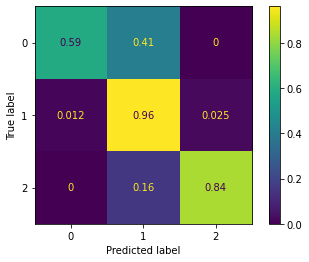

In [ ]:
#DATASET REDUCED

model_red = DecisionTreeClassifier()
model_red.fit(X_train_red,y_train_red)
predict = model_red.predict(X_test_red)
cv_results = cross_val_score(model_red, X_train_red , y_train_red, cv=20, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())
plot_confusion_matrix(model_red, X_test_red, y_test_red, normalize='true')  
plt.show()

Results:
 [0.77777778 0.72222222 0.66666667 0.61111111 0.55555556 0.55555556
 0.55555556 0.88888889 0.64705882 0.52941176 0.76470588 0.58823529
 0.64705882 0.64705882 0.47058824 0.64705882 0.41176471 0.82352941
 0.64705882 0.70588235] 
Mean Accuracy: 0.6431372549019608 
Accuracy STD:  0.11400780075130837


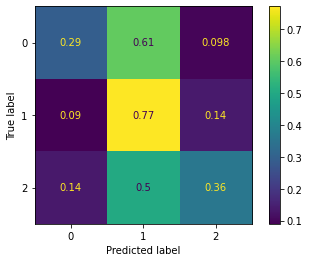

In [ ]:
#DATASET LESS REDUCED


model_lred = DecisionTreeClassifier()
model_lred.fit(X_train_lred,y_train_lred)
predict = model_lred.predict(X_test_lred)
cv_results = cross_val_score(model_lred, X_train_lred , y_train_lred, cv=20, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())
plot_confusion_matrix(model_lred, X_test_lred, y_test_lred, normalize='true')  
plt.show()

Le accuratezze ottenute nei 3 modelli che utilizzano il Decision Tree è inferiore rispetto i precedenti con Logistic Regression.
Il modello più performante è quello che usa il dataset reduced, il quale ha anche una deviazione standard tra accuracy dei 10 fold inferiore rispetto agli altri due modelli less reduced e numeric.

**E’ più affidabile la valutazione fatta con la cross validation o quella fatta con una suddivisione arbitraria del dataset in due parti, training set e test set? Per quale motivo?**

Se il dataset è di dimensioni ridotte,l'utilizzo della cross validation risulta più indicato, specialmente con la strategia stratificata (la quale mantiene il numero di classi nei fold simile a quello del dataset di train originale).
Inoltre con la cross validation possiamo visualizzare una media dell' accuracy e vedere se i risultati per tutti i folder.Infine si può valutare la deviazione standard tra accuracy ottenute. Se questa è elevata possiamo intervenire sul dataset oppure sul modello.
Di conseguenza la cross validation può essere una valutazione migliore ma più costosa a livello computazionale


##4)Considerare il dataset numeric. Considerare l’intervallo di valori assunto dall’attributo age e dividerlo in tre parti. Associare a ogni istanza il valore 0,1,2 a seconda del fatto che l’età sia nel primo, nel secondo o nel terzo intervallo. Eliminare l’attributo age originale, non discretizzato e calcolare l’accuratezza con il metodo 10 cross fold validation. Trasformare la feature discretizzata in 3 feature booleane, una per ogni valore discretizzato. Il valore assegnato sarà 1 nella colonna che rappresenta il valore in esame. 0 nelle altre colonne. Calcolare l’accuratezza con il metodo 10 cross fold validation (punti 4).

In [ ]:
dataset.age.unique()

array([18, 17, 15, 16, 19, 22, 20, 21])

In [ ]:
len(dataset.age.unique())#numero valori di età unici

8

Considerare l’intervallo di valori assunto dall’attributo age e dividerlo in tre parti. Associare a ogni istanza il valore 0,1,2 a seconda del fatto che l’età sia nel primo, nel secondo o nel terzo intervallo.

In [ ]:
numeric_binned = numeric.copy() #creo una copia del dataset
numeric_binned['age'] = pd.cut(numeric_binned['age'],bins=3,labels=[0,1,2])

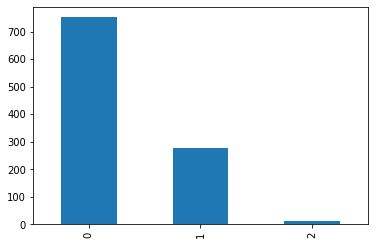

In [ ]:
numeric_binned['age'].value_counts().plot.bar()

In [ ]:
#DATASET NUMERIC BINNED

Y_numeric_bin = numeric_binned['G3']
Y_numeric_bin.value_counts()

X_numeric_bin = numeric_binned.iloc[:,:-1]
X_train_numbin, X_test_numbin, y_train_numbin, y_test_numbin = train_test_split(X_numeric_bin, Y_numeric_bin,test_size=2/3 ,random_state=0)

Results:
 [0.94444444 0.77777778 0.77777778 0.83333333 0.77777778 0.77777778
 0.77777778 0.94444444 0.76470588 0.94117647 0.88235294 0.88235294
 1.         0.76470588 0.94117647 0.76470588 0.70588235 0.94117647
 0.76470588 1.        ] 
Mean Accuracy: 0.8482026143790848 
Accuracy STD:  0.09111422313493192


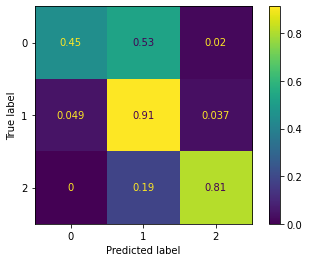

In [ ]:
model_numbin = DecisionTreeClassifier()
model_numbin.fit(X_train_numbin,y_train_numbin)
predict = model_num.predict(X_test_numbin)
cv_results = cross_val_score(model_numbin, X_train_numbin , y_train_numbin, cv=20, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())
plot_confusion_matrix(model_num, X_test_numbin, y_test_numbin, normalize='true')  
plt.show()

L'accuracy del modello precedente di numeric, senza binning, era:
Mean Accuracy: 0.8452614379084968 
Accuracy STD:  0.08637765546420367

C'è quindi stato un miglioramento dell' 1% circa sull'accuracy media e del 2% sulla deviazione standard dell'accuracy

Trasformare la feature discretizzata in 3 feature booleane, una per ogni valore discretizzato. Il valore assegnato sarà 1 nella colonna che rappresenta il valore in esame. 0 nelle altre colonne. Calcolare l’accuratezza con il metodo 10 cross fold validation (punti 4).

In [ ]:
#ONE HOT ENCODING della feature "age"

numeric_1hot = numeric_binned.copy()

dummies = pd.get_dummies(numeric_binned['age'],prefix='age')

numeric_1hot = numeric_1hot.drop(columns='age', axis=1)
numeric_1hot = numeric_1hot.join(dummies)

In [ ]:
numeric_1hot.head()

,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,deltaG,G3,age_0,age_1,age_2
0,1,4,4,2,2,0,1,0,0,1,1,0,0,4,3,4,1,1,3,6,0,0,0,0,0,1,0
1,1,1,1,1,2,0,0,1,0,0,1,1,0,5,3,3,1,1,3,4,0,0,0,0,1,0,0
2,0,1,1,1,2,3,1,0,1,1,1,1,0,4,3,2,2,3,3,10,1,1,0,1,1,0,0
3,1,4,2,1,3,0,0,1,1,1,1,1,1,3,2,2,1,1,5,2,2,1,1,2,1,0,0
4,1,3,3,1,2,0,0,1,1,1,1,0,0,4,3,2,1,2,5,4,0,1,-1,1,1,0,0


In [ ]:
#DATASET NUMERIC 1-HOT

Y_numeric_1hot = numeric_1hot['G3']
Y_numeric_1hot.value_counts()

X_numeric_1hot = numeric_1hot.drop(columns='G3')
X_train_1hot, X_test_1hot, y_train_1hot, y_test_1hot = train_test_split(X_numeric_1hot, Y_numeric_1hot,test_size=2/3 ,random_state=0)

Results:
 [0.94444444 0.83333333 0.83333333 0.83333333 0.88888889 0.83333333
 0.77777778 0.94444444 0.70588235 1.         0.88235294 0.88235294
 1.         0.76470588 0.88235294 0.82352941 0.76470588 1.
 0.76470588 1.        ] 
Mean Accuracy: 0.8679738562091505 
Accuracy STD:  0.08821955802550371


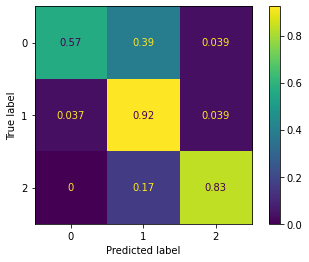

In [ ]:
model_1hot = DecisionTreeClassifier()
model_1hot.fit(X_train_1hot,y_train_1hot)
predict = model_1hot.predict(X_test_1hot)
cv_results = cross_val_score(model_1hot, X_train_1hot , y_train_1hot, cv=20, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())
plot_confusion_matrix(model_1hot, X_test_1hot, y_test_1hot, normalize='true')  
plt.show()

L'accuracy media è rimasta la stessa ma la deviazione standard si è abbassata

##5)Aggiungere al dataset “numeric” gli attributi Mjob e Fjob il cui valore categorico deve essere mappato utilizzando una formula di conversione a scelta. Confrontare il risultato ottenuto con quelli ottenuti in precedenza (punti 4).

In [ ]:
job_list = dataset.Mjob.value_counts().index.tolist()
job_list

['other', 'services', 'at_home', 'teacher', 'health']

In [ ]:
numeric['Mjob'] = dataset['Mjob'].replace(to_replace = job_list, value=[0,1,2,3,4])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
numeric['Fjob'] = dataset['Fjob'].replace(to_replace = job_list, value=[0,1,2,3,4])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
numeric['Fjob'].value_counts()

0    584
1    292
3     65
2     62
4     41
Name: Fjob, dtype: int64

In [ ]:
dataset['Fjob'].value_counts()

other       584
services    292
teacher      65
at_home      62
health       41
Name: Fjob, dtype: int64

In [ ]:
numeric.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,deltaG,G3,Mjob,Fjob
0,18,1,4,4,2,2,0,1,0,0,1,1,0,0,4,3,4,1,1,3,6,0,0,0,0,2,3
1,17,1,1,1,1,2,0,0,1,0,0,1,1,0,5,3,3,1,1,3,4,0,0,0,0,2,0
2,15,0,1,1,1,2,3,1,0,1,1,1,1,0,4,3,2,2,3,3,10,1,1,0,1,2,0
3,15,1,4,2,1,3,0,0,1,1,1,1,1,1,3,2,2,1,1,5,2,2,1,1,2,4,1
4,16,1,3,3,1,2,0,0,1,1,1,1,0,0,4,3,2,1,2,5,4,0,1,-1,1,0,0


Results:
 [0.88888889 0.88888889 0.83333333 0.83333333 0.94444444 0.83333333
 0.72222222 0.83333333 0.76470588 1.         0.88235294 0.94117647
 1.         0.70588235 0.94117647 0.88235294 0.76470588 0.94117647
 0.76470588 0.94117647] 
Mean Accuracy: 0.8653594771241832 
Accuracy STD:  0.08590856236994218


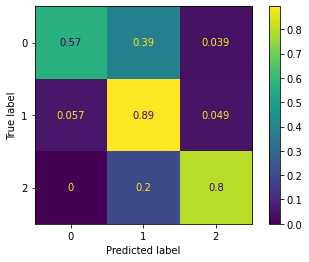

In [ ]:
#DATASET NUMERIC
X_numeric = numeric.drop(columns='G3')
Y = numeric['G3']
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numeric, Y,test_size=2/3 ,random_state=0)

model_num = DecisionTreeClassifier()
model_num.fit(X_train_num,y_train_num)
predict = model_num.predict(X_test_num)
cv_results = cross_val_score(model_num, X_train_num , y_train_num, cv=20, scoring='accuracy')
print("Results:\n",cv_results,"\nMean Accuracy:",cv_results.mean(), "\nAccuracy STD: ",cv_results.std())
plot_confusion_matrix(model_num, X_test_num, y_test_num, normalize='true')  
plt.show()


Il risultato ottenuto è simile al dataset numeric originalmente creato

##6)Partendo dal dataset originale, costruire due dataset contenenti solo le feature numeriche. Uno che rappresenti la scuola GP e l’altro la scuola MS. Costruire due modelli di predizione utilizzando il decision tree. Uno per gli studenti GP e l’altro per gli studenti MS. Allenare entrambi i modelli utilizzando 2/3 delle rispettive istanze come training. Fondere i test in un unico file. Verificare l’accuratezza ottenuta dal test in entrambi i modelli. Quale funziona meglio? (punti 3)

In [ ]:
dataset['school'].unique()

array(['GP', 'MS'], dtype=object)

In [ ]:
gp_ds = dataset[dataset['school']=='GP']
gp_ds = gp_ds.select_dtypes(include='int64')
gp_ds.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,deltaG,G3
0,18,1,4,4,2,2,0,1,0,0,1,1,0,0,4,3,4,1,1,3,6,0,0,0,0
1,17,1,1,1,1,2,0,0,1,0,0,1,1,0,5,3,3,1,1,3,4,0,0,0,0
2,15,0,1,1,1,2,3,1,0,1,1,1,1,0,4,3,2,2,3,3,10,1,1,0,1
3,15,1,4,2,1,3,0,0,1,1,1,1,1,1,3,2,2,1,1,5,2,2,1,1,2
4,16,1,3,3,1,2,0,0,1,1,1,1,0,0,4,3,2,1,2,5,4,0,1,-1,1


In [ ]:
gp_ds.shape

(772, 25)

In [ ]:
ms_ds = dataset[dataset['school']=='MS']
ms_ds = ms_ds.select_dtypes(include='int64')
ms_ds.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,deltaG,G3
349,18,1,3,2,2,1,1,0,1,0,0,1,1,0,2,5,5,5,5,5,10,1,1,0,1
350,19,1,1,1,3,2,3,0,0,0,1,1,1,0,5,4,4,3,3,2,8,1,1,0,1
351,17,1,3,3,2,2,0,0,1,1,1,1,1,0,4,5,4,2,3,3,2,1,1,0,1
352,18,0,1,3,1,1,1,0,0,0,1,0,1,1,4,3,3,2,3,3,7,1,1,0,1
353,19,1,1,1,3,1,1,0,1,0,1,1,1,0,4,4,4,3,3,5,4,1,1,0,1


In [ ]:
ms_ds.shape

(272, 25)

In [ ]:
#CREO I DATASET CON LE LABELS
X_gp = gp_ds.drop(columns='G3')
y_gp = gp_ds['G3']

X_ms = ms_ds.drop(columns='G3')
y_ms = ms_ds['G3']

In [ ]:
#GP
X_traingp, X_testgp, y_traingp, y_testgp = train_test_split(X_gp, y_gp,test_size=2/3 ,random_state=0)

#MS
X_trainms, X_testms, y_trainms, y_testms = train_test_split(X_ms, y_ms,test_size=2/3 ,random_state=0)


modelgp = DecisionTreeClassifier()
modelms = DecisionTreeClassifier()

modelgp.fit(X_traingp,y_traingp)
modelms.fit(X_trainms,y_trainms)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

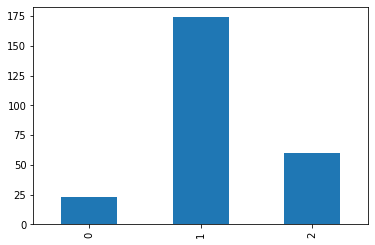

In [ ]:
y_traingp.value_counts().sort_index().plot.bar()

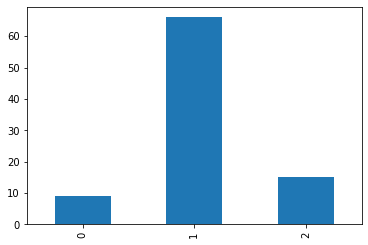

In [ ]:
y_trainms.value_counts().sort_index().plot.bar()

In [ ]:
#UNISCO I DATASET PER CREARE UN UNICO DATASET DI TEST
X_testgpms = pd.concat([X_testgp,X_testms])
y_testgpms = pd.concat([y_testgp,y_testms])

print(X_testgpms.head())
print(y_testgpms.head())

     age  famsize  Medu  Fedu  traveltime  ...  health  absences  G1  G2  deltaG
591   17        1     2     4           1  ...       5         0   2   2       0
725   18        1     2     1           2  ...       5        10   1   1       0
446   15        0     4     2           1  ...       5         0   2   1       1
14    15        1     2     2           1  ...       3         0   1   2      -1
594   17        1     3     3           1  ...       4         6   1   1       0

[5 rows x 24 columns]
591    2
725    1
446    2
14     2
594    1
Name: G3, dtype: int64


In [ ]:
#shuffle del dataset di test creato (con il vettore di label annesso)
sampler = np.random.permutation(len(X_testgp))

X_testgpms = X_testgpms.take(sampler)
y_testgpms =y_testgpms.take(sampler)

print(X_testgpms.head())
print(y_testgpms.head())

     age  famsize  Medu  Fedu  traveltime  ...  health  absences  G1  G2  deltaG
544   15        1     4     3           2  ...       3         6   1   1       0
281   17        0     3     2           1  ...       3        19   1   1       0
540   16        1     3     3           2  ...       5         4   1   1       0
35    15        1     2     3           2  ...       5         0   1   1       0
252   18        1     2     1           1  ...       5         4   0   1      -1

[5 rows x 24 columns]
544    1
281    1
540    1
35     0
252    1
Name: G3, dtype: int64


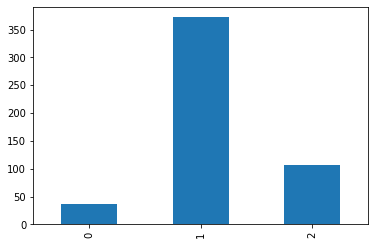

In [ ]:
y_testgpms.value_counts().sort_index().plot.bar()


Accuracy: 0.7747572815533981 



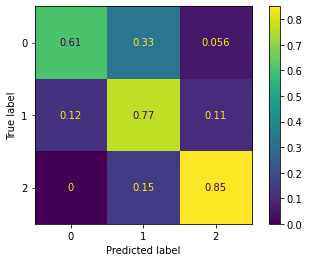

              precision    recall  f1-score   support

           0       0.32      0.61      0.42        36
           1       0.91      0.77      0.83       372
           2       0.68      0.85      0.76       107

    accuracy                           0.77       515
   macro avg       0.64      0.74      0.67       515
weighted avg       0.82      0.77      0.79       515



In [ ]:
#VALUTAZIONE MODELLO GP

predictgp = modelgp.predict(X_testgpms)

print("\nAccuracy:", accuracy_score(y_testgpms, predictgp),"\n")
plot_confusion_matrix(modelgp, X_testgpms, y_testgpms, normalize='true')
plt.show() 
print(classification_report(y_testgpms,predictgp))



Accuracy: 0.8776699029126214 



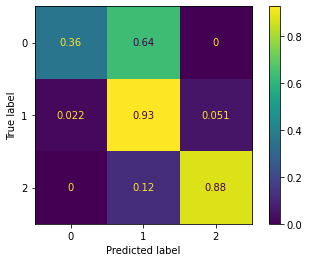

              precision    recall  f1-score   support

           0       0.62      0.36      0.46        36
           1       0.91      0.93      0.92       372
           2       0.83      0.88      0.85       107

    accuracy                           0.88       515
   macro avg       0.79      0.72      0.74       515
weighted avg       0.87      0.88      0.87       515



In [ ]:
#VALUTAZIONE MODELLO MS

predictms = modelms.predict(X_testgpms)

print("\nAccuracy:", accuracy_score(y_testgpms, predictms),"\n")
plot_confusion_matrix(modelms, X_testgpms, y_testgpms, normalize='true')
plt.show() 
print(classification_report(y_testgpms,predictms))


Il modello più preciso è quello allenato con il dataset degli studenti della scuola MS (nonostante il numero minore di istanze)
Si nota comunque lo sbilanciamento del dataset e di conseguenza degli errori di classificazione sulla classe G3 = 0, poco presente

##7)Utilizzare un algoritmo di regressione da applicarsi al dataset del punto 1 per predire “G3”. Arrotondare i valori ottenuti all’intero. Confrontare i risultati ottenuti con quelli ottenuti in precedenza (punti 3).

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [ ]:
Xf = numeric.drop(columns='G3')
Yf = numeric['G3'] 

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(Xf, Yf,test_size=2/3 ,random_state=0)

model = LinearRegression()

model.fit(X_train,y_train)
predict = model.predict(X_test)

In [ ]:
predict_rounded = predict.round(decimals=0)
print(predict_rounded)

[ 1.  1.  1.  1.  1.  1.  2.  1.  1. -0.  1.  1.  2.  1.  1.  1.  1.  1.
  1.  1.  2.  1.  1.  1.  1. -0.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.
  1.  1.  2.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  2.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0. -0.  1.
  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -0.
  2.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  2.  2.  1.
  1.  1.  1.  2.  1.  1.  1.  2.  1.  1.  2.  1.  1.  1.  1.  1.  1.  2.
  1.  1.  1.  1.  2.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  2.  1.
  2.  1. -0.  2.  1.  1.  1.  2.  2.  1.  1.  1.  1.  1.  1.  2.  1.  1.
  1.  1.  2.  1.  1.  1.  1.  1.  2.  0.  1.  1.  1

In [ ]:
#matrice di confusione ed accuracy
print("Confusion Matrix:\n", confusion_matrix(y_test, predict_rounded))

print("\nAccuracy:", accuracy_score(y_test, predict_rounded),"\n")

Confusion Matrix:
 [[ 30  21   0]
 [  6 504   2]
 [  0  29 104]]

Accuracy: 0.9166666666666666 



In [ ]:
#L'accuracy ottenuta è maggiore di quelle ottenute fino ad ora con tutti i modelli, eccetto con il dataset REDUCED che ha ottenuto
#un' accuracy del 92%
#il modello comunque ha difficoltà a predirre la classe 0 (la meno presente nel datset di train) e 
#fa anche qualche errore sulla classe 2